<a href="https://colab.research.google.com/github/KarenLira25/Tarea-ajuste-de-par-metros/blob/main/Tarea3_Ajuste_parametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

El archivo que se adjunta ”Pueblapos.csv” son datos de los casos registrados(nuevos casos) para Puebla reportados por la secretaría de salud.
1.   Cargar los datos y Graficar
2.   Ajustar la primera ola con mínimos cuadrados.
3.   Ajustar la segunda ola con una cadena de Monte Carlo y dar intervalosde confianza para los parámetros.

**Nota 1:**  Puede usar un modelo SIR o si lo prefieren un SEIR. 

**Nota 2:**  Recordar que los datos del archivo son los nuevos casos y no corresponden directamente  a  los  Infectados  (I)  de  un  modelo  SIR.  Tienen  que  definir  una  nueva ecuación que sean los casos acumulados y transformar los datos en casos acumulados.  Es decir, la suma de los casos hasta el tiempo t.


In [87]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Cargar los datos y Graficar

In [88]:
file_name = '/content/drive/MyDrive/Puebla_pos.csv'
df = pd.read_csv(file_name) 
df

,Unnamed: 0,FECHA_SINTOMAS,positivo
0,0,2020-03-02,1
1,1,2020-03-05,2
2,2,2020-03-08,3
3,3,2020-03-09,4
4,4,2020-03-10,3
...,...,...,...
673,673,2022-01-09,493
674,674,2022-01-10,556
675,675,2022-01-11,287
676,676,2022-01-12,149


In [89]:
print(df.dtypes)

Unnamed: 0         int64
FECHA_SINTOMAS    object
positivo           int64
dtype: object


In [90]:
from datetime import datetime
#Filrar los datos por años

#convierto los datos de la columna FECHA_SINTOMAS a datos de tipo fecha para poderlos agrupar por año 
df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'])
#dejo el índice del dataframe en relación a la fecha (columna 'FECHA_SINTOMAS') 
df = df.set_index('FECHA_SINTOMAS')
#selecciono los datos que sean del año 2020 y los guardo en la variable A2020
A2020=df.loc["2020"]
#repito la anterior para los años 2021 y 2022
A2021=df.loc["2021"]
A2022=df.loc["2022"]
#print(A2020)
#print(A2021)
#print(A2022)

In [91]:
#Filtrar los datos por meses para obtener el nuemro total de casos positivos en cada mes

#.groupby(A2020.index.month) es para agrupar los datos de ese año por mes
#.sum('positivo') es para obtener la suma total de casos positivos por mes
#.reset_index() es para que deje de tomar la columna de FECHA_SINTOMAS como índices
#.drop(['Unnamed: 0'], axis=1) es para borrar la columna que enumeraba los renglones de la tabla original
Año2020=A2020.groupby(A2020.index.month).sum('positivo').reset_index().drop(['Unnamed: 0'], axis=1) 
Año2021=A2021.groupby(A2021.index.month).sum('positivo').reset_index().drop(['Unnamed: 0'], axis=1)
Año2022=A2022.groupby(A2022.index.month).sum('positivo').reset_index().drop(['Unnamed: 0'], axis=1)
#print(Año2020)
#print(Año2021)
#print(Año2022)

Text(0, 0.5, 'Número de casos positivos')

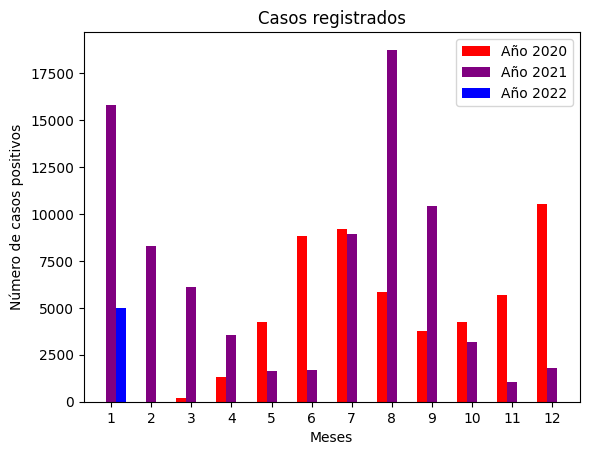

In [92]:
#Grafico los datos
plt.title("Casos registrados")

plt.xticks(Año2021['FECHA_SINTOMAS'])
width = 0.25

plt.bar(Año2020['FECHA_SINTOMAS']-width,Año2020['positivo'],color="red", width=width, label="Año 2020")
plt.legend(loc="upper left")
plt.bar(Año2021['FECHA_SINTOMAS'],Año2021['positivo'],color="purple", width=width, label="Año 2021")
plt.legend(loc="upper left")
plt.bar(Año2022['FECHA_SINTOMAS']+width,Año2022['positivo'],color="blue", width=width, label="Año 2022")
plt.legend(loc="upper right")

plt.xlabel("Meses") 
plt.ylabel("Número de casos positivos") 

#2. Ajustar la primera ola con mínimos cuadrados.

#3.Ajustar la segunda ola con una cadena de Monte Carlo y dar intervalosde confianza para los parámetros.